In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arr = np.array([8, 8, 17, 24, 54, 78, 89, 102, 132])

# Method 1: Visual approach

In this method, we first calculate the indices corresponding to the median, lower and upper quartiles. Then, we use these indices to create the arrays containing included data and excluded data.

In [3]:
# Calculate the indices for median, lower and upper quartiles
length = len(arr)
print('Length of array: ', length)

index_lower = int((length-1)/4)
index_median = int((length-1)/2)
index_upper = int(3*(length-1)/4)

print(f'Indices: {index_lower}, {index_median}, {index_upper}')

Length of array:  9
Indices: 2, 4, 6


In [4]:
# Retrieve the median value, lower and upper quartiles
median = arr[index_median]
lower = arr[index_lower]
upper = arr[index_upper]

print(f'Lower quartile: {lower}')
print(f'Median: {median}')
print(f'Upper quartile: {upper}')

Lower quartile: 17
Median: 54
Upper quartile: 89


In [5]:
# Calculate the interquartile range
interquartile_range = upper-lower
print(f'Interquartile range: {interquartile_range}')

Interquartile range: 72


In [6]:
# Create three new arrays from original data:
# - 1 array containing all of the data between the lower and 
#      upper quartiles (data that you will keep)
# - 1 array containing all of the data below the lower quartile
# - 1 array containing all of the data above the upper quartile

x_values_excluded_low = np.arange(0, index_lower)
excluded_low = arr[x_values_excluded_low]

x_values_included = np.arange(index_lower, index_upper + 1)
included = arr[x_values_included]

x_values_excluded_high = np.arange(index_upper + 1, length)
excluded_high = arr[x_values_excluded_high]

print(excluded_low)
print(included)
print(excluded_high)

[8 8]
[17 24 54 78 89]
[102 132]


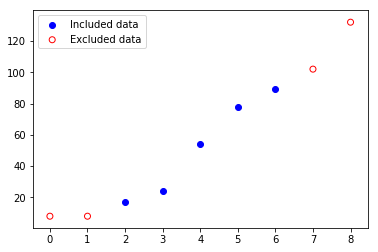

In [7]:
# Create a plot displaying included and excluded data
plt.scatter(x_values_included, included, marker='o', color='b',
            label='Included data')
plt.scatter(x_values_excluded_low, excluded_low, marker='o',
            edgecolors='r', facecolors='', label='Excluded data')
plt.scatter(x_values_excluded_high, excluded_high, marker='o',
            edgecolors='r', facecolors='')
plt.legend()
plt.show()

# Method 2

In this method, we use numpy to calculate the median, lower and upper quartiles. We then select the excluded and included data based on these values.

In [8]:
lower, median, upper = np.percentile(arr, [25, 50, 75])

print(f'Lower quartile: {lower}')
print(f'Median: {median}')
print(f'Upper quartile: {upper}')

Lower quartile: 17.0
Median: 54.0
Upper quartile: 89.0


In [9]:
x_values = np.arange(len(arr))

x_values_excluded_low = x_values[arr < lower]
excluded_low = arr[arr < lower]

x_values_excluded_high = x_values[arr > upper]
excluded_high = arr[arr > upper]

x_values_included = x_values[(arr >= lower) & (arr <= upper)]
included = arr[(arr >= lower) & (arr <= upper)]

print(x_values_excluded_low, excluded_low)
print(x_values_included, included)
print(x_values_excluded_high, excluded_high)

[0 1] [8 8]
[2 3 4 5 6] [17 24 54 78 89]
[7 8] [102 132]


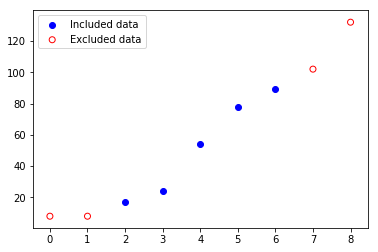

In [10]:
# Create a plot displaying included and excluded data
plt.scatter(x_values_included, included, marker='o', color='b',
            label='Included data')
plt.scatter(x_values_excluded_low, excluded_low, marker='o',
            edgecolors='r', facecolors='', label='Excluded data')
plt.scatter(x_values_excluded_high, excluded_high, marker='o',
            edgecolors='r', facecolors='')
plt.legend()
plt.show()